In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense,Embedding,BatchNormalization,Dropout,GlobalAveragePooling1D,Bidirectional
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tokenizer = Tokenizer()

In [3]:
# data = "Over hill \n over dale \n Thorough bush \n thorough brier \n Over park, over pale \n Thorough flood \n thorough fire \n I do wander everywhere \n Swifter than the moon s sphere \n And I serve the Fairy Queen \n To dew her orbs upon the green \n The cowslips tall her pensioners be \n In their gold coats spots you see \n Those be rubies \n fairy favours \n In those freckles live their savours \n I must go seek some dewdrops here \n And hang a pearl in every cowslip s ear"
# corpus = data.lower().split("\n")
# print(corpus)  # a list of sentences

In [4]:
file = open("hit'em up.txt", 'r', encoding='utf-8')
corpus = []
for line in file.readlines():
    line = line.strip('\n')
    corpus.append(line)
print(corpus)

["I ain't got no motherfuckin friends", "That's why I fucked yo' bitch, you fat motherfucker", '(Take money) West side, Bad Boy killers (take money)', 'You know who the realest is niggaz we bring it to you (take money)', '(Take money)', 'First off, fuck your bitch and the click you claim', 'Westside when we ride come equipped with game', 'You claim to be a player but I fucked your wife', 'We bust on Bad Boy niggaz fucked for life', "Plus Puffy tryin' ta see me weak hearts I rip", 'Biggie Smalls and Junior M.A.F.I.A. Some mark-ass bitches', "We keep on comin' while we runnin' for yo' jewels", 'Steady gunnin, keep on bustin at them fools, you know the rules', "Lil' Ceaser, go ask ya homie how I leave ya", 'Cut your young ass up, leave you in pieces, now be deceased', "Lil' Kim, don't fuck around with real G's", "Quick to snatch yo' ugly ass off the streets, so fuck peace", "I let them niggaz know it's on for life", 'So let the Westside ride tonight', 'Bad Boy murdered on wax and killed',

In [5]:
import re
import string
# use regular expression to clean data
new_corpus = []
for sentence in corpus:
    sentence = sentence.lower() # make all text in lower case
    sentence = re.sub('\[.*?\]', '', sentence) # remove [] and the text inside []
    sentence = re.sub('[%s]' % re.escape(string.punctuation), '', sentence)  # remove all punctuations
    sentence = re.sub('\w*\d\w*', '', sentence) # remove any words that contain numbers in them
    new_corpus.append(sentence)
print(new_corpus)

['i aint got no motherfuckin friends', 'thats why i fucked yo bitch you fat motherfucker', 'take money west side bad boy killers take money', 'you know who the realest is niggaz we bring it to you take money', 'take money', 'first off fuck your bitch and the click you claim', 'westside when we ride come equipped with game', 'you claim to be a player but i fucked your wife', 'we bust on bad boy niggaz fucked for life', 'plus puffy tryin ta see me weak hearts i rip', 'biggie smalls and junior mafia some markass bitches', 'we keep on comin while we runnin for yo jewels', 'steady gunnin keep on bustin at them fools you know the rules', 'lil ceaser go ask ya homie how i leave ya', 'cut your young ass up leave you in pieces now be deceased', 'lil kim dont fuck around with real gs', 'quick to snatch yo ugly ass off the streets so fuck peace', 'i let them niggaz know its on for life', 'so let the westside ride tonight', 'bad boy murdered on wax and killed', 'fuck wit me and get yo caps peeled 

In [18]:
tokenizer.fit_on_texts(new_corpus)
total_words = len(tokenizer.word_index)
print(total_words)

432


In [7]:
word_index = tokenizer.word_index
print(word_index)

{'you': 1, 'the': 2, 'to': 3, 'we': 4, 'and': 5, 'i': 6, 'money': 7, 'a': 8, 'take': 9, 'fuck': 10, 'with': 11, 'ya': 12, 'up': 13, 'it': 14, 'your': 15, 'on': 16, 'when': 17, 'me': 18, 'in': 19, 'all': 20, 'aint': 21, 'but': 22, 'see': 23, 'get': 24, 'is': 25, 'be': 26, 'now': 27, 'of': 28, 'nigga': 29, 'im': 30, 'my': 31, 'little': 32, 'bad': 33, 'know': 34, 'niggaz': 35, 'em': 36, 'motherfuckers': 37, 'they': 38, 'got': 39, 'yo': 40, 'boy': 41, 'for': 42, 'how': 43, 'let': 44, 'its': 45, 'hit': 46, 'this': 47, 'out': 48, 'niggas': 49, 'us': 50, 'no': 51, 'bring': 52, 'biggie': 53, 'dont': 54, 'do': 55, 'or': 56, 'our': 57, 'motherfuckin': 58, 'bitch': 59, 'motherfucker': 60, 'who': 61, 'junior': 62, 'mafia': 63, 'ass': 64, 'tupac': 65, 'bout': 66, 'feel': 67, 'thug': 68, 'motherfucking': 69, 'as': 70, 'why': 71, 'fucked': 72, 'off': 73, 'click': 74, 'westside': 75, 'ride': 76, 'life': 77, 'keep': 78, 'them': 79, 'real': 80, 'yall': 81, 'style': 82, 'open': 83, 'die': 84, 'about': 85

In [8]:
input_seq = []
for line in corpus:  # for each sentences in the corpus
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_seq.append(n_gram_seq)

print(input_seq)

[[6, 39], [6, 39, 51], [6, 39, 51, 58], [6, 39, 51, 58, 166], [71, 6], [71, 6, 72], [71, 6, 72, 59], [71, 6, 72, 59, 1], [71, 6, 72, 59, 1, 168], [71, 6, 72, 59, 1, 168, 60], [9, 7], [9, 7, 169], [9, 7, 169, 89], [9, 7, 169, 89, 33], [9, 7, 169, 89, 33, 41], [9, 7, 169, 89, 33, 41, 90], [9, 7, 169, 89, 33, 41, 90, 9], [9, 7, 169, 89, 33, 41, 90, 9, 7], [1, 34], [1, 34, 61], [1, 34, 61, 2], [1, 34, 61, 2, 91], [1, 34, 61, 2, 91, 25], [1, 34, 61, 2, 91, 25, 35], [1, 34, 61, 2, 91, 25, 35, 4], [1, 34, 61, 2, 91, 25, 35, 4, 52], [1, 34, 61, 2, 91, 25, 35, 4, 52, 14], [1, 34, 61, 2, 91, 25, 35, 4, 52, 14, 3], [1, 34, 61, 2, 91, 25, 35, 4, 52, 14, 3, 1], [1, 34, 61, 2, 91, 25, 35, 4, 52, 14, 3, 1, 9], [1, 34, 61, 2, 91, 25, 35, 4, 52, 14, 3, 1, 9, 7], [9, 7], [170, 73], [170, 73, 10], [170, 73, 10, 15], [170, 73, 10, 15, 59], [170, 73, 10, 15, 59, 5], [170, 73, 10, 15, 59, 5, 2], [170, 73, 10, 15, 59, 5, 2, 74], [170, 73, 10, 15, 59, 5, 2, 74, 1], [170, 73, 10, 15, 59, 5, 2, 74, 1, 92], [75,

In [9]:
max_seq_len = max([len(x) for x in input_seq])
input_seq = np.array(pad_sequences(input_seq, maxlen=max_seq_len, padding='pre'))
print(input_seq)

[[ 0  0  0 ...  0  6 39]
 [ 0  0  0 ...  6 39 51]
 [ 0  0  0 ... 39 51 58]
 ...
 [ 0  0  0 ... 10  4 33]
 [ 0  0  0 ...  4 33 41]
 [ 0  0  0 ... 33 41 90]]


In [10]:
X = input_seq[:,:max_seq_len-1]
y = input_seq[:,max_seq_len-1:]
y_binary = to_categorical(y)
X.shape,y.shape,y_binary.shape

((948, 16), (948, 1), (948, 432))

In [17]:
model = Sequential()
model.add(Embedding(total_words, 240, input_length=max_seq_len-1))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer=adam, metrics=['accuracy'])
history = model.fit(X, y_binary, epochs=50)

Train on 948 samples
Epoch 1/50
948/948 [==============================] - 4s 4ms/sample - loss: 5.7770 - accuracy: 0.0401
Epoch 2/50
948/948 [==============================] - 0s 246us/sample - loss: 4.9837 - accuracy: 0.0907
Epoch 3/50
948/948 [==============================] - 0s 239us/sample - loss: 4.0198 - accuracy: 0.1783
Epoch 4/50
948/948 [==============================] - 0s 314us/sample - loss: 2.8101 - accuracy: 0.3344
Epoch 5/50
948/948 [==============================] - 0s 262us/sample - loss: 1.7753 - accuracy: 0.5622
Epoch 6/50
948/948 [==============================] - 0s 361us/sample - loss: 1.0066 - accuracy: 0.7711
Epoch 7/50
948/948 [==============================] - 0s 295us/sample - loss: 0.5442 - accuracy: 0.8776
Epoch 8/50
948/948 [==============================] - 0s 299us/sample - loss: 0.3628 - accuracy: 0.9124
Epoch 9/50
948/948 [==============================] - 0s 301us/sample - loss: 0.2647 - accuracy: 0.9241
Epoch 10/50
948/948 [========================

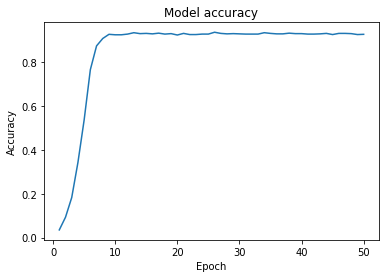

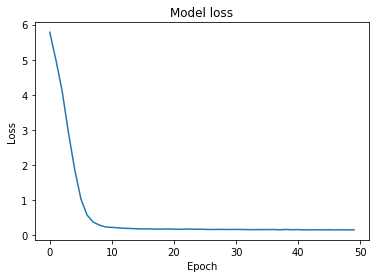

In [13]:
epoch_range=range(1,50+1)
plt.plot(epoch_range,history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [19]:
# generating texts
seed_text = "fuck your stupid mama "
next_words = 50

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_len-1,padding='pre')
    prediction = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == prediction:
            output_word = word
            break
    seed_text += " "+ output_word
print(seed_text)

fuck your stupid mama  and junior a i a in front of you nigga you nigga you fuck you too take money take money take money take money take money take money but side bad boy side bad boy killers take money take money take money you take money west side bad boy killers
